## Introduction

In this example, we will introduce the example of AggMap in feature restructuring on Randomized MNIST data. Specifically, we first permute the pixel randomly to generate the unordered data, this will destroy the structured MNIST images into randomly permuted pixels, then we used AggMap to reconstruct from these random pixels. 

To randomize the MNISt data, we first reshaped the 28x28 pixels into 684 feature points (FPs) and permuted these 684 FPs randomly, and then reshaped them into the new shuffled 28x28 images. The random permuted images OrgRP1 have destroyed the spatial correlation of the original images totally.


After the unsupervised learning from these randomized MNIST data by AggMap, the disrupted MNIST images can been reconstructed to the very structured  images and very similar to the original images. Moreover, the reconstruction ability of AggMap is related to the number of randomized samples for unsupervised pre-learning. You can try to use different number of the randomized samples to fit AggMap and to transform the randomized data, and see what happens.

## Step0: Import AggMap and Orignal MNIST data

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from aggmap import AggMap


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #load data

In [4]:
_, w, h = x_train.shape
orignal_cols = ['p-%s' % str((i+1)).zfill(len(str(w*h))) for i in range(w*h)]
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], w*h), columns=orignal_cols)
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], w*h), columns=orignal_cols)

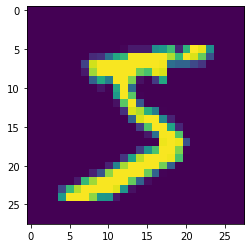

In [5]:
ax = plt.imshow(x_train_df.iloc[0].values.reshape(w,h))

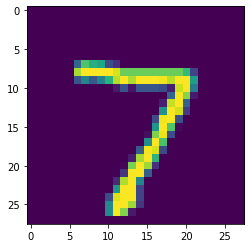

In [6]:
ax = plt.imshow(x_test_df.iloc[0].values.reshape(w,h))

## Step1: MNIST pixel random permutation

In [7]:
shuffled_cols = shuffle(orignal_cols, random_state=111)
x_train_df_shuffled = x_train_df[shuffled_cols]
x_test_df_shuffled = x_test_df[shuffled_cols]

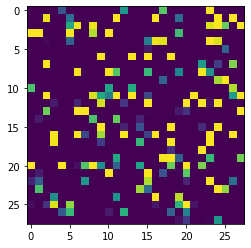

In [8]:
ax = plt.imshow(x_train_df_shuffled.iloc[0].values.reshape(w,h))

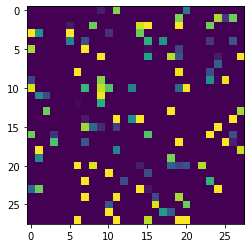

In [9]:
ax = plt.imshow(x_test_df_shuffled.iloc[0].values.reshape(w,h))

## Step2: AggMap pre-fitting on training set

In [10]:
mp = AggMap(x_train_df_shuffled, metric='correlation')
mp = mp.fit(cluster_channels=1, var_thr=0, verbose=0)

2022-08-01 15:00:08,013 - INFO - [bidd-aggmap] - Calculating distance ...
2022-08-01 15:00:08,041 - INFO - [bidd-aggmap] - the number of process is 16


100%|##############################################################################################################################################| 784/784 [00:00<00:00, 961.65it/s]


2022-08-01 15:00:44,524 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-01 15:00:46,360 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-01 15:00:46,799 - INFO - [bidd-aggmap] - Finished


## Step3: AggMap transformation on training and test test

In [11]:
x_train_restructured = mp.batch_transform(x_train_df_shuffled.values)
x_test_restructured = mp.batch_transform(x_test_df_shuffled.values)

100%|#########################################################################################################################################| 10000/10000 [00:01<00:00, 7557.54it/s]


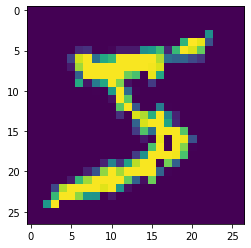

In [12]:
ax = plt.imshow(x_train_restructured[0].reshape(*mp.fmap_shape))

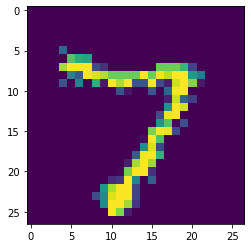

In [13]:
ax = plt.imshow(x_test_restructured[0].reshape(*mp.fmap_shape))

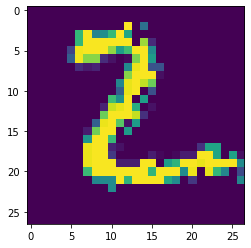

In [14]:
ax = plt.imshow(x_test_restructured[1].reshape(*mp.fmap_shape))

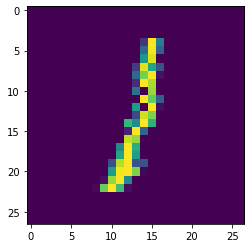

In [15]:
ax = plt.imshow(x_test_restructured[2].reshape(*mp.fmap_shape))

## Step4: AggMap visualization

In the scatter and grid plot, we will get the final optimized position for each pixel that is in arbitrary order

In [20]:
# the scatter plot
mp.plot_scatter(radius = 6, enabled_data_labels=True)

2022-08-01 15:04:55,078 - INFO - [bidd-aggmap] - generate file: ./feature points_717_correlation_umap_scatter
2022-08-01 15:04:55,084 - INFO - [bidd-aggmap] - save html file to ./feature points_717_correlation_umap_scatter


In [21]:
# the regular 2D grid plot
mp.plot_grid(enabled_data_labels=True)

2022-08-01 15:05:06,872 - INFO - [bidd-aggmap] - generate file: ./feature points_717_correlation_umap_mp
2022-08-01 15:05:06,885 - INFO - [bidd-aggmap] - save html file to ./feature points_717_correlation_umap_mp
